<a href="https://colab.research.google.com/github/llllava/mobile-price-range-prediction/blob/main/MOBILE_PRICE_RANGE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**

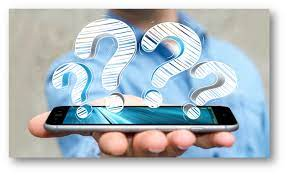

# In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices.

# The objective is to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory, etc) and its selling price. In this problem, we do not have to predict the actual price but a price range indicating how high the price is.

# Data Description -

# Battery_power - Total energy a battery can store in one time measured in mAh
# Blue - Has bluetooth or not
# Clock_speed - speed at which microprocessor executes instructions
# Dual_sim - Has dual sim support or not
# Fc - Front Camera mega pixels
# Four_g - Has 4G or not
# Int_memory - Internal Memory in Gigabytes
# M_dep - Mobile Depth in cm
# Mobile_wt - Weight of mobile phone
# N_cores - Number of cores of processor
# Pc - Primary Camera mega pixels
# Px_height - Pixel Resolution Height
# Px_width - Pixel Resolution Width
# Ram - Random Access Memory in Mega Bytes
# Sc_h - Screen Height of mobile in cm
# Sc_w - Screen Width of mobile in cm
# Talk_time - longest time that a single battery charge will last when you are
# Three_g - Has 3G or not
# Touch_screen - Has touch screen or not
# Wifi - Has wifi or not
# Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost). 

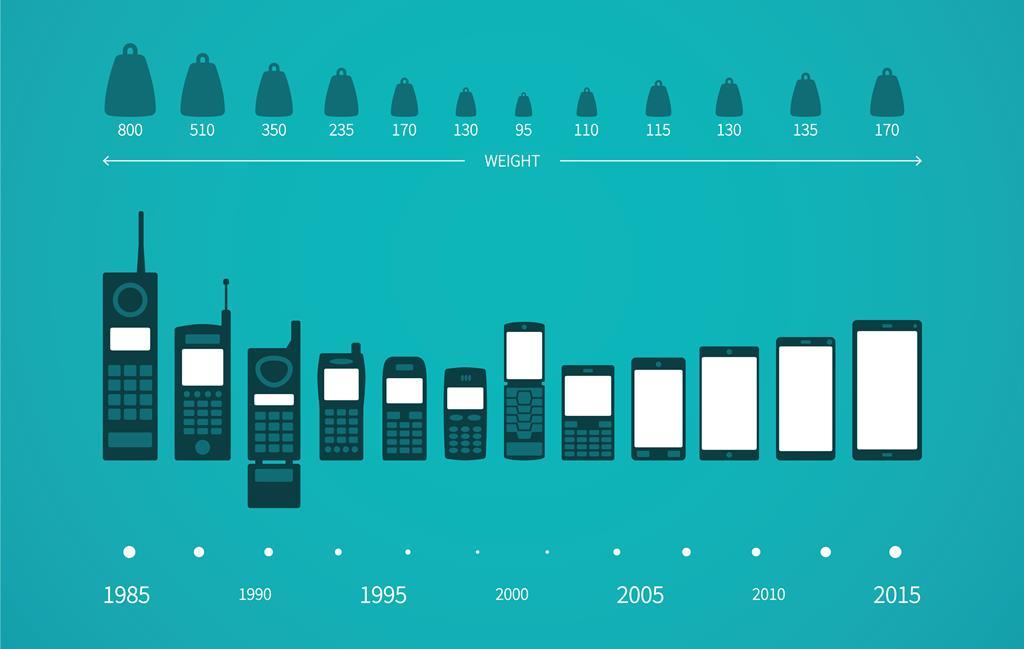

In [ ]:
# Import Google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Import some important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read CSV data set
df=pd.read_csv('/content/data_mobile_price_range.csv')

In [ ]:
# Top 5 Rows and Columns of our Data Set
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
# Bottom 5 Rows and Columns of our Data Set
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
# Check Shape of our Data Set
df.shape

(2000, 21)

In [ ]:
# Check Information of our Data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
# All columns of our Data set
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
# Check Description of Data 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [ ]:
sns.pairplot(df,hue='price_range')

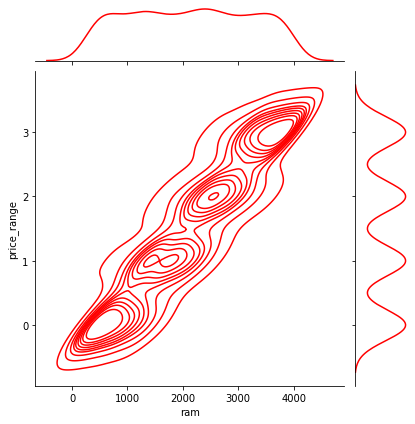

In [ ]:
# How does ram is affected by price
sns.jointplot(x='ram',y='price_range',data=df,color='red',kind='kde');

#  Basic Observations:
We can see that pc, sc_width and px_height has minimum value 0. which is not possible in any mobile. We need to handle this mismatch.

In [ ]:
# Let's Check How many observations having pc value as 0.
print(df[df['pc']==0].shape[0])

101


In [ ]:
# Let's Check How many observations having screen width value as 0.
print(df[df['sc_w']==0].shape[0])

180


In [ ]:
# Let's Check How many observations having px_hieght value as 0.
print(df[df['px_height']==0].shape[0])

2


In [ ]:
# Now,We see As there are only 2 observations having px_height=0. so we will drop it.
df=df[df['px_height']!=0]

In [ ]:
df.shape

(1998, 21)

In [ ]:
col_names = ['sc_w','pc']
df.loc[:,['sc_w','pc']]

,sc_w,pc
0,7,2
1,3,6
2,2,6
3,8,9
4,2,14
...,...,...
1995,4,14
1996,10,3
1997,1,3
1998,10,5


# K-Nearest Neighbors Imputations (KNNImputer)

In [ ]:
# Replacing 0 with NAN so that we can implement KNN Imputer.
df['sc_w']=df['sc_w'].replace(0,np.nan)
df['pc']=df['pc'].replace(0,np.nan)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Import KNN Algorithm with imputer from sklearn
from sklearn.impute import KNNImputer
impute_knn = KNNImputer(n_neighbors=1)
df=pd.DataFrame(impute_knn.fit_transform(df),columns=df.columns)

In [ ]:
df.shape

In [ ]:
# Checking How many observations having sc_w value as 0.
df[df['sc_w']==0].shape[0]

In [ ]:
df[df['pc']==0].shape[0]

In [ ]:
df['pc'].unique()

In [ ]:
df.describe().T

In [ ]:
df.nunique()

from above we observed that data is divided into two category numeric columns and binaray columns

# Numeric columns:
### battery_power,  clock_speed,  fc,  int_memory,  mobile_wt,n_cores,  pc,  px_height,  px_width,  ram,  sc_h,  sc_w, talk_time,  price_range
# Binary Columns:
### blue,  dual_sim,  four_g,  three_g,  touch_screen,  wifi

In [ ]:
# Now we, check binary columns
bool_cols =df[[col for col in df 
             if np.isin(df[col].dropna().unique(), [0, 1]).all()]]
bool_cols


In [ ]:
# Then , now we check numeric columns
new_data = df.drop(bool_cols, axis=1)
new_data

In [ ]:
bool_cols['blue'].value_counts()

In [ ]:
# Let's check null values
df.isnull().sum()

In [ ]:
df['four_g'].value_counts()

In [ ]:
df['three_g'].value_counts()

In [ ]:
# Now, Let's Visulaizing null values using heatmap.
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),cmap='Set3',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

# Exploratory Data Analysis(EDA)

In [ ]:
price_range=df['price_range'].value_counts()

In [ ]:
plt.figure(figsize=(10,8))
plt.rcParams['font.size'] = '15'
#sns.countplot(x="price_range",data=df,palette='hls',hue='price_range')
sns.countplot(x="price_range",data=df,palette='Set1')
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.xlabel('price range', size=25)
plt.ylabel('count', size=25)
plt.title('price range distribution')

In [ ]:
labels = ["low cost", "medium cost", "high cost", "very high cost"]

price_range.plot.pie(explode=[0.05]*4,labels=labels,autopct='%1.2f%%',figsize=(12,8),fontsize=15)


As we see above Our Data set is balance data set beacuse we have found price range equally distributed.

In [ ]:
plt.figure(figsize = (12,8))
plt.rcParams['font.size'] = '16'
sns.pointplot(x=df['price_range'],y = df['int_memory'],data = df,color='r')
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])

plt.title(' price range  Vs  internal memory', size=25)

As we can see above where price range is high internal memory is more.

# Relation between binary columns:

In [ ]:
bool_cols.columns

In [ ]:
plt.figure(figsize=(15,10))
rows=2
col=3
count=1
#var_list=['blue','dual_sim','four_g','three_g','wifi','touch_screen']
labels=['Yes','No']
for var in bool_cols:
  plt.subplot(rows,col,count)
  bool_cols[var].value_counts().plot.pie(autopct='%1.1f%%',fontsize=15,labels=labels)
  plt.rcParams['font.size'] = '20'
  plt.title(f'has {var} or not',fontsize=16)
  plt.tight_layout()
  count=count+1

# From above Pie chart we can oberved that.

1.50.5% mobile having bluetooth

2.51% mobile having dual sim 

3.52.1% mobile having 4G device

4.76.1% mobile suited 3G 

5.50.3% mobile have touch screen pad

 6.50.8% mobile has wifi device

# Relation Between RAM,Battery_power,px_height and px_width

In [ ]:
# Plotting  price_range vs other fearures
plt.figure(figsize=(20,10))

labels=['0=low_cost','1=medium_cost','2=high_cost','3=very_high_cost']

rows=2   
cols=2
counter=1

variables=['ram','battery_power','px_height','px_width']

for col in variables:
  plt.subplot(rows,cols,counter)
  sns.barplot(x=df['price_range'],y=df[col])
  plt.title(f'Price range v/s {col}')
  counter=counter+1
  plt.tight_layout()

From above bar graph: As price range increases ram, battery power,px_height and px_width also increases.

# Mobiles with both 3G and 4G.

In [ ]:
# Mobiles have both 3G and 4G specifications.
three_g_and_4g_df=df[(df['three_g']==1) & (df['four_g']==1)]

In [ ]:
x=three_g_and_4g_df['price_range'].value_counts()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(three_g_and_4g_df['price_range'])
plt.xticks(ticks=[0,1,2,3],labels=['Low cost','medium cost','high cost','very high cost'])
plt.title("Mobiles with 3G and 4G features ")
plt.show()

AS we can see from above for very hight cost price range mobile suited both 3G and 4G feature.

# Relation between price range with n_cores and m_dep

In [ ]:
list_ordinal=['n_cores','m_dep']
# Plt.figure(figsize=(22,22))
plt.rcParams['font.size'] = '15'
for item in list_ordinal:
  
  df.groupby(['price_range'])[item].value_counts().unstack().plot.bar(figsize=(15,8))
  plt.title(f'Price range grouped by {item}',size=25)
  plt.xlabel('price_range', size=25)
  plt.ylabel('No. of phones',size=25)

As we can see from above:

where price range is high and very high mobile contain more number of cores.

price range and mobile depth has not clear any relation.

# Number of phone with Front camera and primary camera

In [ ]:
plt.figure(figsize=(12,8))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels',size=20)


AS we can see from above maximum mobile having primary camera but very few of them front camera.

In [ ]:
 ## kde plot with 3 features

sns.displot(kind='kde',data=df, x='price_range', y='battery_power',hue='four_g');

# Let's Check which numerical feature is driving the price range most.

In [ ]:
new_data.columns

In [ ]:
# List_1=['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','sc_h','ram','sc_w','talk_time']
# Plotting boXplot and distribution
# Counter=1
for var in new_data:
    plt.figure(figsize=(11,8))
    plt.rcParams['font.size'] = '16'
    sns.lineplot(x=df['price_range'],y=df[var])
    plt.title(f'{var} VS price_range',fontsize=20)

# Let's Check the distribution of numerical columns and Outliers.

In [ ]:
new_data.columns

In [ ]:
numeric_col=new_data.columns.drop('price_range')

In [ ]:
for var in numeric_col:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='blue')
    fig.set_title(f'{var}',size=24)
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='red')
    fig.set_title(f'{var}',size=24)
    fig.set_xlabel(var,size=25)

    plt.show()

# as we observed:

1.   Data is well distrubted.
2.   fc and px_height has some outliers.


# Outlier Treatment.

In [ ]:
Q1 = df["fc"].quantile(0.25)
Q3 = df['fc'].quantile(0.99)
IQR = Q3-Q1

# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['fc'] <= Q3)]

In [ ]:
Q1 = df["px_height"].quantile(0.25)
Q3 = df['px_height'].quantile(0.99)
IQR = Q3-Q1
# Outliers are present after Quartile 3. so we will take datapoints before Q3.
df = df[(df['px_height'] <= Q3)]

In [ ]:
# Visualising whether oultliers are removed or not.
for var in ['fc','px_height']:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = sns.boxplot(y=df[var],color='red')
    fig.set_title(f'{var}',size=24)
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = sns.distplot(df[var],color='green')
    fig.set_title(f'{var}',size=24)
    fig.set_xlabel(var)

    plt.show()

In [ ]:
df.shape

In [ ]:
# Create copy of mobile_data\n",
df=df.copy()

In [ ]:
# Check duplicated values 
print(df.duplicated().sum())

In [ ]:
df.head()

In [ ]:

# Scater plot with corelation between depeddnt and independt columns columns and its distribution
for i in df[1:]:                   # using for loop
   plt.figure(figsize = (12,9))    # Setting figure size
   plt.rcParams['font.size'] = '16' # Setting font size 
   feature = df[i]
   label = df['price_range']
   
   correlation = feature.corr(label)
   sns.scatterplot(x=i,y = df['price_range'],data = df)
   plt.title('price_range vs ' + i + '- correlation: ' + str(correlation))
   z = np.polyfit(df[i], df['price_range'], 1)
   slope = np.poly1d(z)(df[i])

   plt.plot(df[i], slope, "r--", lw=3)


# CORRELATION

In [ ]:
# Correlation matrix, shown by heatmap
plt.figure(figsize=(27,12))
plt.rcParams['font.size'] = '16'

correlation = df.corr() 
sns.heatmap(abs(correlation),annot=True, cmap=plt.cm.Accent_r,fmt='.2g')

From above we observed that:
1. Price range and Ram is highly correlated to each other 
2.pc and fc have some what correlation to each other


# feature selection

# Multicollinearity

In [ ]:
# Let's check Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['price_range']]])

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['price_range','mobile_wt']]])

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['price_range','mobile_wt','px_width']]])

From VIF table : Vif values are not much high so we can not eliminate any feature so lets check for chai squre test

In [ ]:
# Now, we will Separating variable
# X variables (indpendent variables) 
# Y variables (dependent variables) 
X=df.drop('price_range',axis=1)
y=df["price_range"]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# No we Will select the  top  important features
bestfeatures = SelectKBest(score_func=chi2, k=14)
fit = bestfeatures.fit(X,y)

In [ ]:
# Creating score's and coolumn's dataframe
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# Conacatenating above two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

In [ ]:
# Check dataframe
featureScores

In [ ]:
# 12 features with highest chi squared statistic 
print(featureScores.nlargest(14,'Score'))

AS from above table we have selected best 14 features that are not correlated to each other.

In [ ]:
# 14 features with highest chi squared statistic are selected as independent variables.
X=df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_h','talk_time','sc_w','fc','n_cores','pc','touch_screen','four_g']]

# dependent varaible
y=df['price_range']

In [ ]:
X.shape, y.shape

In [ ]:
# Let's importing all essential Libraries By Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix,confusion_matrix,roc_curve,roc_auc_score,auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# Train_test Split:

In [ ]:
# Splitting the data into- train and test 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# **The ML Classification models that we use are :**



# **1) Logistic Regression**
# **2) K-nearest Neighbour classifier**
## **3) Support Vector Machine(SVM)**
## **4) Support Vector Machine(SVM) with hypertuning**

# 1) Logistic Regression

In [ ]:
# Logistic Regression
# training model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

# Getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_logi = lr.predict(X_test)
cm = confusion_matrix(y_test,y_pred_logi)
print('confusion matrix:\n',cm)

# Checking accuracy
from sklearn.metrics import accuracy_score
lra = accuracy_score(y_test,y_pred_logi)
print('accuracy score = ',lra)

In [ ]:
y_pred_train_logi = lr.predict(X_train)

In [ ]:
# Vraiance Score for Logistic Regressor
print('Variance score for the Logistic Regressor raw is : %.2f' % lr.score(X_test, y_test))



from logitic regression we got 0.65 as accuracy score that is too low and its indicate data is underfitteed so we can try next model.

# **2) K-nearest Neighbour classifier**

In [ ]:
#knn
#training model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski',p = 2)
knn.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_knn = knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred_knn)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
knna = accuracy_score(y_test,y_pred_knn)
print('accuracy score = ',accuracy_score(y_test,y_pred_knn))

In [ ]:
y_pred_train_knn = knn.predict(X_train)

In [ ]:
# Vraiance Score for K - Nearest Neighbour
print('Variance score for the KNN raw is : %.2f' % knn.score(X_test, y_test))

from KNN we got accuracy score for test data is 0.91 its seems good but we try to improve our accuracy so lets check by svm

# **3) Support Vector Machine(SVM)**

In [ ]:
#SVM
#training model
from sklearn.svm import SVC
svc = SVC(kernel = 'linear',random_state = 0)
svc.fit(X_train,y_train)

#getting confusion matrix
from sklearn.metrics import confusion_matrix
y_pred_svc = svc.predict(X_test)
cm = confusion_matrix(y_test,y_pred_svc)
print('confusion matrix:\n',cm)

#checking accuracy
from sklearn.metrics import accuracy_score
sva =accuracy_score(y_test,y_pred_svc)
print('accuracy score = ',accuracy_score(y_test,y_pred_svc))

In [ ]:
y_pred_train_svm = svc.predict(X_train)

In [ ]:
# Variance Score For Support Vector Machine 
print('Variance score for the SVC raw is : %.2f' % svc.score(X_test, y_test))

From SVM classifier we got test accuracy 0.96 this seems very good score . lets check by Hyper parameter tunning and what would be result we get



# 4) Support Vector Machine(SVM) with Hyper-parameter tuning


In [ ]:
# Parameter grid for GridSearchCv
grid_values = {
    'C':[0.01,0.1,1,10],
    'kernel' : ["linear","poly","rbf","sigmoid"],
    'degree' : [1,3,5,7],
    'gamma' : [0.01,1]
}

In [ ]:
# creating an object for classifier
svm  = SVC ()

In [ ]:
# Hyperparameter tuning with the GrdiSearhCV with cv=5
svm_cv = GridSearchCV(svm, grid_values, cv = 5,verbose=2)
svm_cv.fit(X_train,y_train)     # fitting the data into the model

Fitting 5 folds for each of 128 candidates, totalling 640 fits
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ........C=0.01, degree=1, gamma=0.01, kernel=linear; total time=   0.2s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ..........C=0.01, degree=1, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END ...........C=0.01, degree=1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ...........C=0.01, degree=1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 3, 5, 7],
                         'gamma': [0.01, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=2)

In [ ]:
# Getting the best parameters
svm_cv.best_params_

{'C': 1, 'degree': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [ ]:
# Getting the best estimators
svm_cv.best_estimator_

SVC(C=1, degree=1, gamma=0.01, kernel='poly')

In [ ]:
# Applying best parameters to the SVM model.
svm_optimal=SVC(C=1, degree=1, gamma=0.01, kernel='poly',probability=True)
svm_optimal.fit(X_train,y_train)   # fitting the data

SVC(C=1, degree=1, gamma=0.01, kernel='poly', probability=True)

In [ ]:
# Predicting the y values of train and test set.
y_train_pred=svm_optimal.predict(X_train)    
y_pred=svm_optimal.predict(X_test)

In [ ]:
y_train_pred

array([3., 3., 3., ..., 3., 3., 2.])

In [ ]:
y_pred

array([3., 3., 0., 0., 2., 1., 3., 1., 2., 0., 0., 0., 1., 1., 1., 1., 3.,
       3., 2., 1., 1., 1., 1., 0., 2., 3., 2., 1., 2., 3., 1., 0., 3., 0.,
       3., 3., 3., 1., 2., 2., 1., 2., 3., 3., 1., 1., 0., 2., 1., 3., 1.,
       1., 1., 2., 3., 3., 1., 3., 1., 1., 2., 3., 0., 2., 0., 0., 1., 3.,
       0., 1., 0., 0., 2., 0., 1., 1., 2., 1., 1., 1., 2., 2., 3., 0., 1.,
       3., 3., 3., 1., 3., 0., 3., 0., 0., 3., 0., 1., 2., 1., 3., 1., 3.,
       3., 0., 1., 0., 2., 3., 1., 1., 2., 1., 3., 3., 2., 3., 0., 0., 2.,
       2., 2., 1., 0., 0., 1., 2., 0., 3., 0., 3., 0., 1., 0., 3., 2., 2.,
       3., 3., 3., 1., 3., 0., 3., 3., 1., 1., 0., 3., 1., 0., 1., 0., 0.,
       1., 3., 1., 1., 3., 0., 2., 3., 1., 3., 0., 0., 2., 2., 0., 3., 2.,
       1., 3., 1., 1., 0., 3., 3., 1., 2., 3., 2., 1., 0., 1., 0., 3., 3.,
       2., 0., 2., 2., 0., 0., 1., 1., 3., 2., 3., 3., 0., 0., 0., 2., 2.,
       2., 0., 1., 1., 1., 0., 2., 0., 2., 3., 3., 3., 0., 1., 0., 3., 0.,
       2., 3., 3., 0., 0.

In [ ]:
# Checkig the accuracy score of train set.
svm_ac_hyp_train=accuracy_score(y_train,y_train_pred)
print('SVM hypertuning train accuracy',svm_ac_hyp_train)

SVM hypertuning train accuracy 0.9870748299319728


In [ ]:
# Checking the accuracy of test data
svm_ac_hyp=accuracy_score(y_test,y_pred)
print('SVM hypertuning test accuracy',svm_ac_hyp)


SVM hypertuning test accuracy 0.9694501018329938


After hyper parameter tuning is SVM classifier we got train accuracy is .98 and test accuracy is .96 its seems good , we can conclude that this model perform very well for our data set

# Plotting accuracy graph


Text(0.5, 1.0, 'Plotting the Model Accuracies')

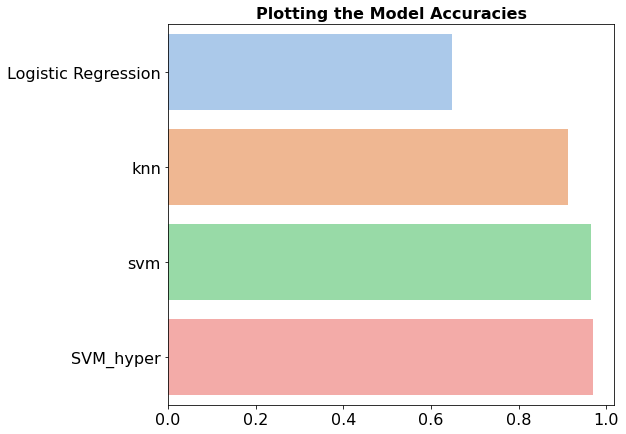

In [ ]:
# Comparing All accuracies
plt.figure(figsize= (8,7))
ac = [lra,knna,sva,svm_ac_hyp]
name = ['Logistic Regression','knn','svm','SVM_hyper']
sns.barplot(x = ac,y = name,palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

From above chart: SVM and SVM with Hyper Parameter tuning having approximately accuracy we have found.

In [ ]:
# Import some metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
# R2 score of Logistic Train Performance
r2_score(y_train, y_pred_train_logi)

0.6552236311988267

In [ ]:
# R2 score of KNN Train Performance
r2_score(y_train, y_pred_train_knn)

0.9615677391804831

In [ ]:
# R2 score of SVM Train Performance
r2_score(y_train, y_pred_train_svm)

0.9944301071276063

In [ ]:
# R2 score of SVM hypertuing Train Performance
r2_score(y_train,y_train_pred )

0.9894172035424519

In [ ]:
# Test Performance logistic regressor
r2_score(y_test , y_pred_logi)

0.6893296179932176

In [ ]:
# Test Performance KNN
r2_score(y_test , y_pred_knn)

0.9341929732694993

In [ ]:
# Test Performane SVM
r2_score(y_test , y_pred_svc)

0.9739832685018951

In [ ]:
# Test Performance of SVM  Hyper parameter tuning
r2_score(y_test,y_pred)

0.9770440604428486

## **Conclusion:**



# 1) From EDA we can observed that mobile have many feature but Ram,Battery power most affected the price range.
# 2) SVM give the best accuracy score .96 and after hypertuning we got approximate same accuracy that is .96 , we can say that SVM is best model for our data set.
#  
# 3) From r2 score for SVM for train data 0.99 and for test data .97 ,its looks good but seems overfitted so we exerpiment though hyper parameter tuning and after that we got r2 score for train data is .98 and for test data is .97 , it give us best experiment value and we can say that SVM perform very well for Mobile data set.
